In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def load(filename):
    df = pd.read_csv(filename, index_col=['sector_code', 'stage', 'year'])
    return df['mass_iron']

def compare(name):
    df = pd.DataFrame({
        'new': load('../data/%s.csv' % name),
        'old': load('uktradeinfo_results/%s.csv' % name),
    })

    df['abs'] = df['new'] - df['old']
    df['rel'] = df['abs'] / df['old'] - 1
    
    return df

def plot_sector_comparisons(df):
    df = df.groupby(['sector_code', 'year']).sum()

    fig, ax = plt.subplots(5, 3, figsize=(10, 15), sharex=True, sharey=True)
    for sector, a in zip(imports.index.levels[0], ax.flat):
        if sector in df['new']:
            df['new'][sector].plot(ax=a)
        if sector in df['old']:
            df['old'][sector].plot(ax=a, linestyle='--')
        a.set_title(sector)

In [3]:
imports = compare('imports')
exports = compare('exports')

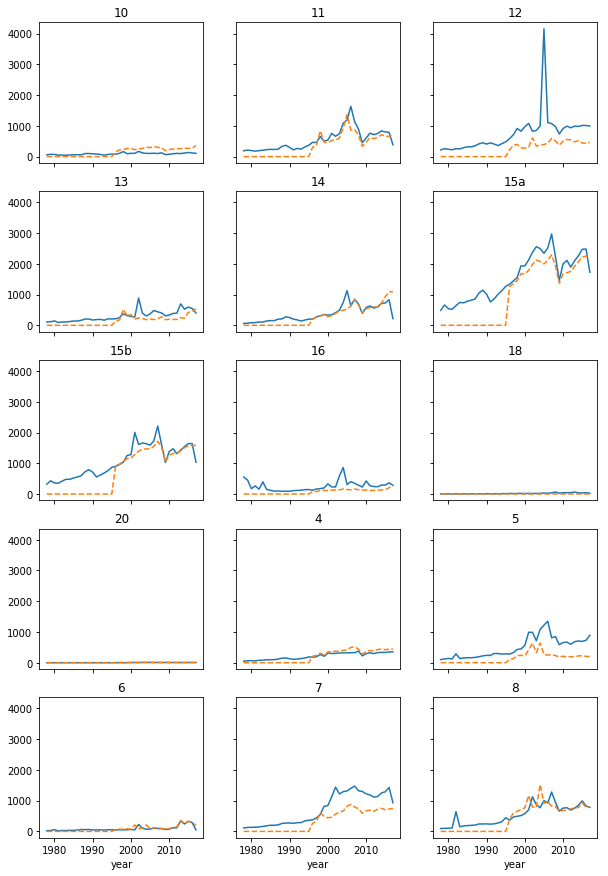

In [4]:
plot_sector_comparisons(imports)

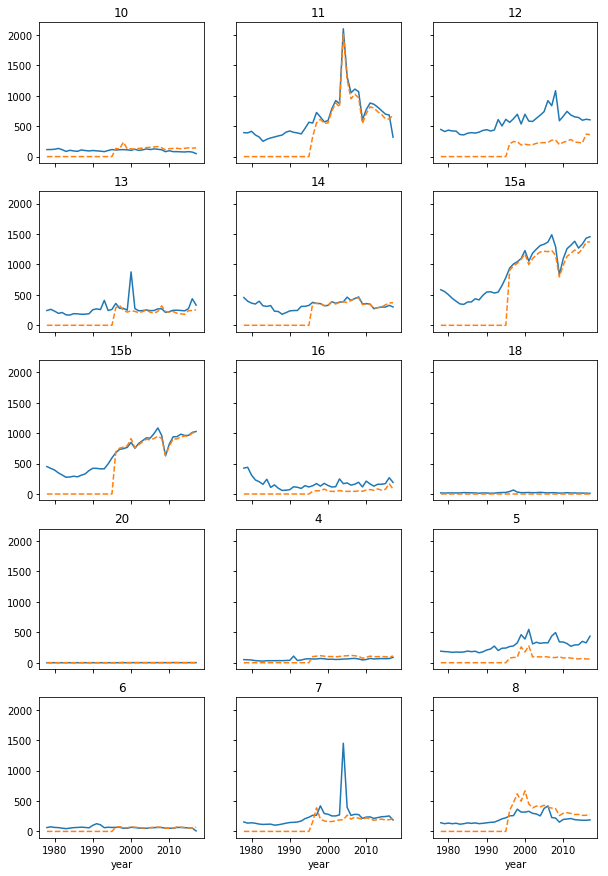

In [5]:
plot_sector_comparisons(exports)